#  Plots generated from Python Script (DRIVER.PY)
Import solution_sumary_csv generated from python script into Jupyter Notebook for easy plotting

In [328]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import MODEL_BC_IC as BC_IC
import functions
import os
import imageio as io

plt.rcParams.update({'font.size': 16})


In [329]:
path = 'C:\\Users\\adamc\\PycharmProjects\\clothing_model\\SOLUTION_CSV'

my_csv_files = []
# r=root, d=directories, f = files
for r, d, f in os.walk(path):
    for file in f:
        if '.csv' in file:
            my_csv_files.append(os.path.join(r, file))

for f in my_csv_files:
    print('FOUND: ' , f)

print('\n')
print(len(my_csv_files), 'CSV files found')

FOUND:  C:\Users\adamc\PycharmProjects\clothing_model\SOLUTION_CSV\conden_concen_history.csv
FOUND:  C:\Users\adamc\PycharmProjects\clothing_model\SOLUTION_CSV\enthalpy_sorption_history.csv
FOUND:  C:\Users\adamc\PycharmProjects\clothing_model\SOLUTION_CSV\fabric_sorption_history.csv
FOUND:  C:\Users\adamc\PycharmProjects\clothing_model\SOLUTION_CSV\fiber_water_concen_history.csv
FOUND:  C:\Users\adamc\PycharmProjects\clothing_model\SOLUTION_CSV\q_1_history.csv
FOUND:  C:\Users\adamc\PycharmProjects\clothing_model\SOLUTION_CSV\q_conden_history.csv
FOUND:  C:\Users\adamc\PycharmProjects\clothing_model\SOLUTION_CSV\q_evap_history.csv
FOUND:  C:\Users\adamc\PycharmProjects\clothing_model\SOLUTION_CSV\q_L_history.csv
FOUND:  C:\Users\adamc\PycharmProjects\clothing_model\SOLUTION_CSV\q_sorp_history.csv
FOUND:  C:\Users\adamc\PycharmProjects\clothing_model\SOLUTION_CSV\raw_water_concen_history.csv
FOUND:  C:\Users\adamc\PycharmProjects\clothing_model\SOLUTION_CSV\rh_history.csv
FOUND:  C:\Us

In [330]:
csv_dict={}

for file in my_csv_files:
    key_name = (file.split('\\')[-1]).split('.csv')[0]  # grab name of file only
    csv_dict[key_name] = file

    
temp_solution_df = pd.read_csv(csv_dict['temp_c_history'], sep=',', index_col=0)
post_RH_df = pd.read_csv(csv_dict['rh_post_absorption_history'], sep=',', index_col=0)


ambient_air_C = BC_IC.BOUNDARY_INPUT_PARAMETERS['air temp']
ambient_RH = BC_IC.BOUNDARY_INPUT_PARAMETERS['air rh'] * 100
fabric_ic_C = BC_IC.FABRIC_IC_INPUT['initial clothing temp']
fabric_ic_RH = BC_IC.FABRIC_IC_INPUT['initial clothing rh']

iteration_count = post_RH_df.shape[0]
fabric_nodes = BC_IC.NUMBER_OF_NODES
one_constant = np.ones(iteration_count)
final_time = temp_solution_df.iloc[-1][0]
delta_x =BC_IC.FABRIC_INPUT_PARAMETERS['fabric thickness'] / fabric_nodes

initial_distance = 0
cumulitve_distance = np.asarray([delta_x*i for i in range(1, fabric_nodes+1)])



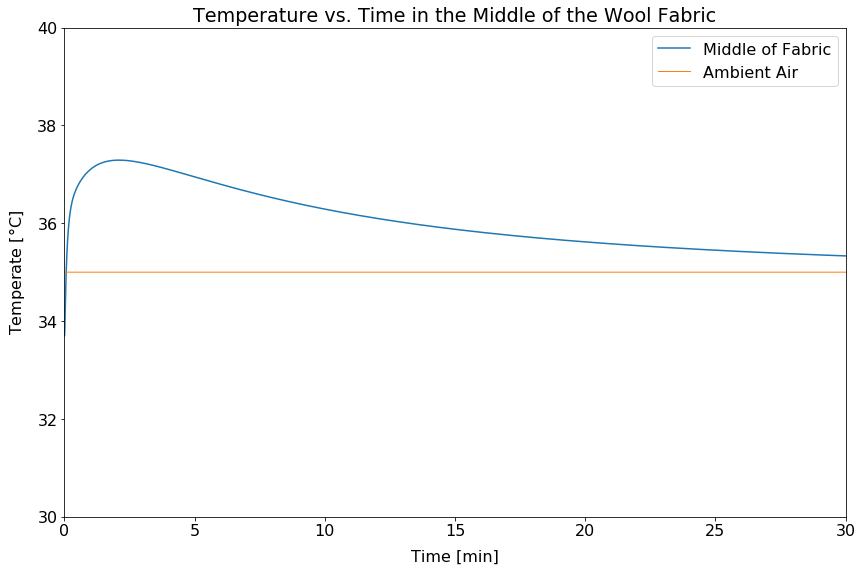

In [331]:
fig, ax = plt.subplots(ncols=1, figsize=(14, 9))
ax.set_ylim((30, 40))
ax.set_xlim((0, final_time))
ax.set_ylabel(r'Temperate [$\degree$C]', labelpad=10)
ax.set_xlabel('Time [min]', labelpad=10)
ax.plot(temp_solution_df['Time [minutes]'], temp_solution_df['Temp C at Node 11 [C]'], linewidth=1.5, label='Middle of Fabric')
ax.plot(temp_solution_df['Time [minutes]'], ambient_air_C*one_constant, linewidth=1, label='Ambient Air')
ax.set_title('Temperature vs. Time in the Middle of the Wool Fabric')
ax.legend()

Attempt to Make animated gif of temp in clothings nodes as a function of time

In [332]:
plt.rcParams.update({'font.size': 12})
y_lower = 32  # temperature upper  for plot
x_upper = (cumulitve_distance[-1] + delta_x)*1000  # x upper limit for plot
x_values = np.insert(np.asarray(cumulitve_distaince)*1000, 0 ,0)  # include starting point at hot plate x=0


x_label =[str(round(x,2)) for x in x_values]   # round 2 places for node length
for i, value in enumerate(x_label):
    if i == 0:
        x_label[i] = value + f'\n\nHot\nPlate'
    else:
        x_label[i] = value + f'\n\n Node \n{i}'  # include spaces and Node Number

        
        

for n, sec in enumerate(temp_solution_df['Time [minutes]'][0::120]):  # steps of 120 -> 0.1, 0.2, 0.3 seconds
    
    fig, ax = plt.subplots(ncols=1, figsize=(15, 5))
    ax.set_ylim((y_lower, 40))
    ax.set_xlim((0, x_upper))


    ax.set_yticks(np.arange(y_lower,40 + 1,1))
    ax.set_xticks(np.round(x_values,decimals=2))
    ax.set_xticklabels(x_label)

    ax.set_ylabel(r'Temperate [$\degree$C]', labelpad=10, fontsize=16)
    ax.set_xlabel('Distance from Hotplate [mm]', labelpad=20, fontsize=16)


    y_values = np.insert(temp_solution_df.iloc[n*120,1:].values, 0, 35)

    ax.plot(x_values,y_values, linewidth=2.5, label='Fabric') # plot temps at ti,e 


    ax.plot(temp_solution_df['Time [minutes]'], ambient_air_C*one_constant, linewidth=1, linestyle='dashed', label='Plate and Ambient Air')
    ax.set_title(f'Temperature vs. Distance of Wool Fabric ontop of Sweating Hot Plate {sec} seconds', fontsize=18)
    ax.grid(linestyle='-', linewidth=0.5, axis='x')

    ax.legend()
    plt.tight_layout()
    

    # SAVE FILE WITH YEAR INDEX
    number_to_with_fill = str(n*120).zfill(5)
    filename = f'.//PLOTS//temp_at_{number_to_with_fill}_iteration'
    print(filename)
    plt.savefig(filename,dpi=150)
    plt.close('all')

.//PLOTS//temp_at_00000_iteration
.//PLOTS//temp_at_00120_iteration
.//PLOTS//temp_at_00240_iteration
.//PLOTS//temp_at_00360_iteration
.//PLOTS//temp_at_00480_iteration
.//PLOTS//temp_at_00600_iteration
.//PLOTS//temp_at_00720_iteration
.//PLOTS//temp_at_00840_iteration
.//PLOTS//temp_at_00960_iteration
.//PLOTS//temp_at_01080_iteration
.//PLOTS//temp_at_01200_iteration
.//PLOTS//temp_at_01320_iteration
.//PLOTS//temp_at_01440_iteration
.//PLOTS//temp_at_01560_iteration
.//PLOTS//temp_at_01680_iteration
.//PLOTS//temp_at_01800_iteration
.//PLOTS//temp_at_01920_iteration
.//PLOTS//temp_at_02040_iteration
.//PLOTS//temp_at_02160_iteration
.//PLOTS//temp_at_02280_iteration
.//PLOTS//temp_at_02400_iteration
.//PLOTS//temp_at_02520_iteration
.//PLOTS//temp_at_02640_iteration
.//PLOTS//temp_at_02760_iteration
.//PLOTS//temp_at_02880_iteration
.//PLOTS//temp_at_03000_iteration
.//PLOTS//temp_at_03120_iteration
.//PLOTS//temp_at_03240_iteration
.//PLOTS//temp_at_03360_iteration
.//PLOTS//temp

.//PLOTS//temp_at_28920_iteration
.//PLOTS//temp_at_29040_iteration
.//PLOTS//temp_at_29160_iteration
.//PLOTS//temp_at_29280_iteration
.//PLOTS//temp_at_29400_iteration
.//PLOTS//temp_at_29520_iteration
.//PLOTS//temp_at_29640_iteration
.//PLOTS//temp_at_29760_iteration
.//PLOTS//temp_at_29880_iteration
.//PLOTS//temp_at_30000_iteration
.//PLOTS//temp_at_30120_iteration
.//PLOTS//temp_at_30240_iteration
.//PLOTS//temp_at_30360_iteration
.//PLOTS//temp_at_30480_iteration
.//PLOTS//temp_at_30600_iteration
.//PLOTS//temp_at_30720_iteration
.//PLOTS//temp_at_30840_iteration
.//PLOTS//temp_at_30960_iteration
.//PLOTS//temp_at_31080_iteration
.//PLOTS//temp_at_31200_iteration
.//PLOTS//temp_at_31320_iteration
.//PLOTS//temp_at_31440_iteration
.//PLOTS//temp_at_31560_iteration
.//PLOTS//temp_at_31680_iteration
.//PLOTS//temp_at_31800_iteration
.//PLOTS//temp_at_31920_iteration
.//PLOTS//temp_at_32040_iteration
.//PLOTS//temp_at_32160_iteration
.//PLOTS//temp_at_32280_iteration
.//PLOTS//temp

In [333]:
#CREATE SORTED LIST OF FILENAMES
file_names = sorted((fn for fn in os.listdir('./PLOTS') if fn.startswith('temp_at')))



prefix='./PLOTS/'
for i, file in enumerate(file_names):
    file_names[i] = prefix + file 



# USE IMAGE IO TO CREATE A GIF
with io.get_writer('Temp_vs_Time.gif', mode='I', duration=0.1) as writer:
    #ITERATE OVER FILENAMES
    for filename in file_names:
        #READ IN FILE
        image = io.imread(filename)
        #APPEND FILE TO GIF
        writer.append_data(image)
writer.close()

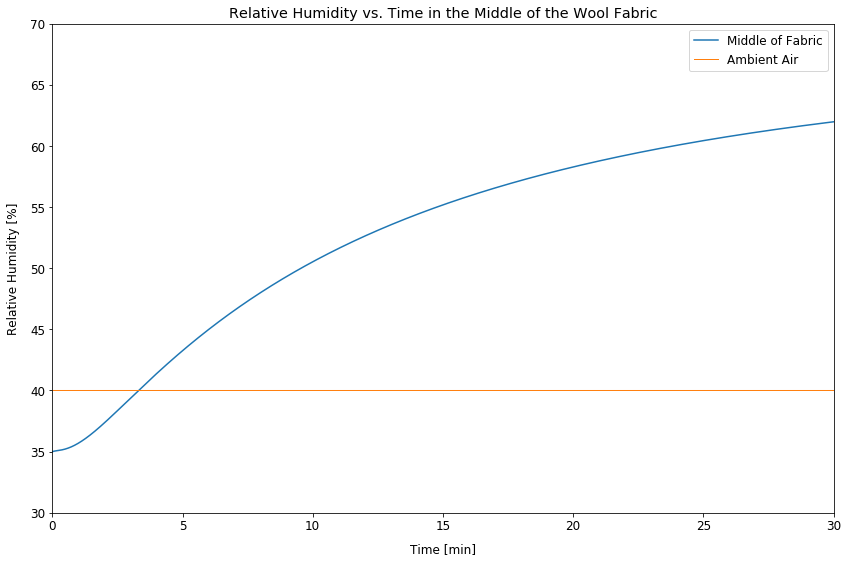

In [334]:
fig, ax = plt.subplots(ncols=1, figsize=(14, 9))
ax.set_ylim((30, 70))
ax.set_xlim((0, final_time))
ax.set_ylabel(r'Relative Humidity [%]', labelpad=10)
ax.set_xlabel('Time [min]', labelpad=10)
ax.plot(post_RH_df['Time [minutes]'], post_RH_df['Rh Post Absorption at Node 11 [%]'], linewidth=1.5, label='Middle of Fabric')
ax.plot(post_RH_df['Time [minutes]'], ambient_RH*one_constant, linewidth=1, label='Ambient Air')
ax.set_title('Relative Humidity vs. Time in the Middle of the Wool Fabric')
ax.legend()

['0.0\n\nHot\nPlate', '0.41\n\n Node \n1', '0.82\n\n Node \n2', '1.22\n\n Node \n3', '1.63\n\n Node \n4', '2.04\n\n Node \n5', '2.45\n\n Node \n6', '2.86\n\n Node \n7', '3.26\n\n Node \n8', '3.67\n\n Node \n9', '4.08\n\n Node \n10', '4.49\n\n Node \n11', '4.9\n\n Node \n12', '5.31\n\n Node \n13', '5.71\n\n Node \n14', '6.12\n\n Node \n15', '6.53\n\n Node \n16', '6.94\n\n Node \n17', '7.35\n\n Node \n18', '7.75\n\n Node \n19', '8.16\n\n Node \n20', '8.57\n\n Node \n21']


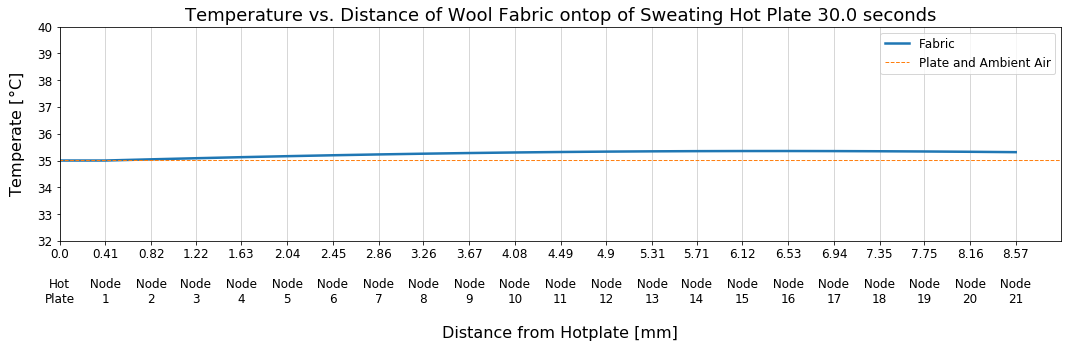

In [335]:
plt.rcParams.update({'font.size': 12})
fig, ax = plt.subplots(ncols=1, figsize=(15, 5))
y_lower = 32


ax.set_ylim((y_lower, 40))
ax.set_xlim((0, (cumulitve_distance[-1] + delta_x)*1000))

x_values = np.insert(np.asarray(cumulitve_distaince)*1000, 0 ,0)

x_label =[str(round(x,2)) for x in x_values] 
for i, value in enumerate(x_label):
    if i == 0:
        x_label[i] = value + f'\n\nHot\nPlate'
    else:
        x_label[i] = value + f'\n\n Node \n{i}'

print(x_label)        

ax.set_yticks(np.arange(y_lower,40 + 1,1))
ax.set_xticks(np.round(x_values,decimals=2))
ax.set_xticklabels(x_label)

ax.set_ylabel(r'Temperate [$\degree$C]', labelpad=10, fontsize=16)
ax.set_xlabel('Distance from Hotplate [mm]', labelpad=20, fontsize=16)


y_values = np.insert(temp_solution_df.iloc[n*120,1:].values, 0, 35)

ax.plot(x_values,y_values, linewidth=2.5, label='Fabric') # plot temps at ti,e 


ax.plot(temp_solution_df['Time [minutes]'], ambient_air_C*one_constant, linewidth=1, linestyle='dashed', label='Plate and Ambient Air')
ax.set_title(f'Temperature vs. Distance of Wool Fabric ontop of Sweating Hot Plate {sec} seconds', fontsize=18)
ax.grid(linestyle='-', linewidth=0.5, axis='x')

ax.legend()
plt.tight_layout()
plt.savefig('test',dpi=150)

